In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# importing data
df = pd.read_csv('data/unique_outages.csv', parse_dates=['Start', 'Finish'])

# remove unplanned
df = df[df['Unplanned?'] != 1]

# filter the duration hours, only if there are expected outages, and non-outlier values, remove the one 'VIC/ TAS'
df = df[(df['Duration_Hours'] <= 1000) &(df['Duration_Hours'] != 0) & (df['Region'] != 'VIC/ TAS')]
df.head(5)

,Region,NSP,Start,Finish,Network Asset,Recall_Day_Hours,Recall_Night_Hours,Project Work?,Unplanned?,DNSP Aware?,Generator Aware?,Inter-Regional,Status_Description,Status_Code,Reason,Duration_Hours,Impact,file_name,Asset Type
0,SA,ElectraNet,2030-08-05 07:30:00,2030-08-11 17:30:00,Tailem Bend - Tungkillo No.2 275 kV Line,6.0,12.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,153.6,A credible contingency event during this plann...,2024-08-26,Line
1,VIC,AusNet,2025-03-10 06:00:00,2025-03-10 16:00:00,MooraboolSydenham No.1 500 kV Line,4.0,0.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,Line
2,VIC,AusNet,2025-02-03 07:00:00,2025-02-03 17:00:00,MooraboolSydenham No.2 500 kV Line,4.0,0.0,0,0,0,0,0,Planned,RESUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,Line
3,VIC,AusNet,2025-02-03 06:00:00,2025-02-03 18:00:00,MooraboolSydenham No.1 500 kV Line,2.0,0.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,12.0,A credible contingency event during this plann...,2024-08-26,Line
4,VIC,AusNet,2025-02-03 06:00:00,2025-02-03 16:00:00,MooraboolSydenham No.2 500 kV Line,4.0,0.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,Line


In [3]:
df['Region'].value_counts()

Region
VIC    1256
QLD     378
SA      288
NSW     281
TAS     145
Name: count, dtype: int64

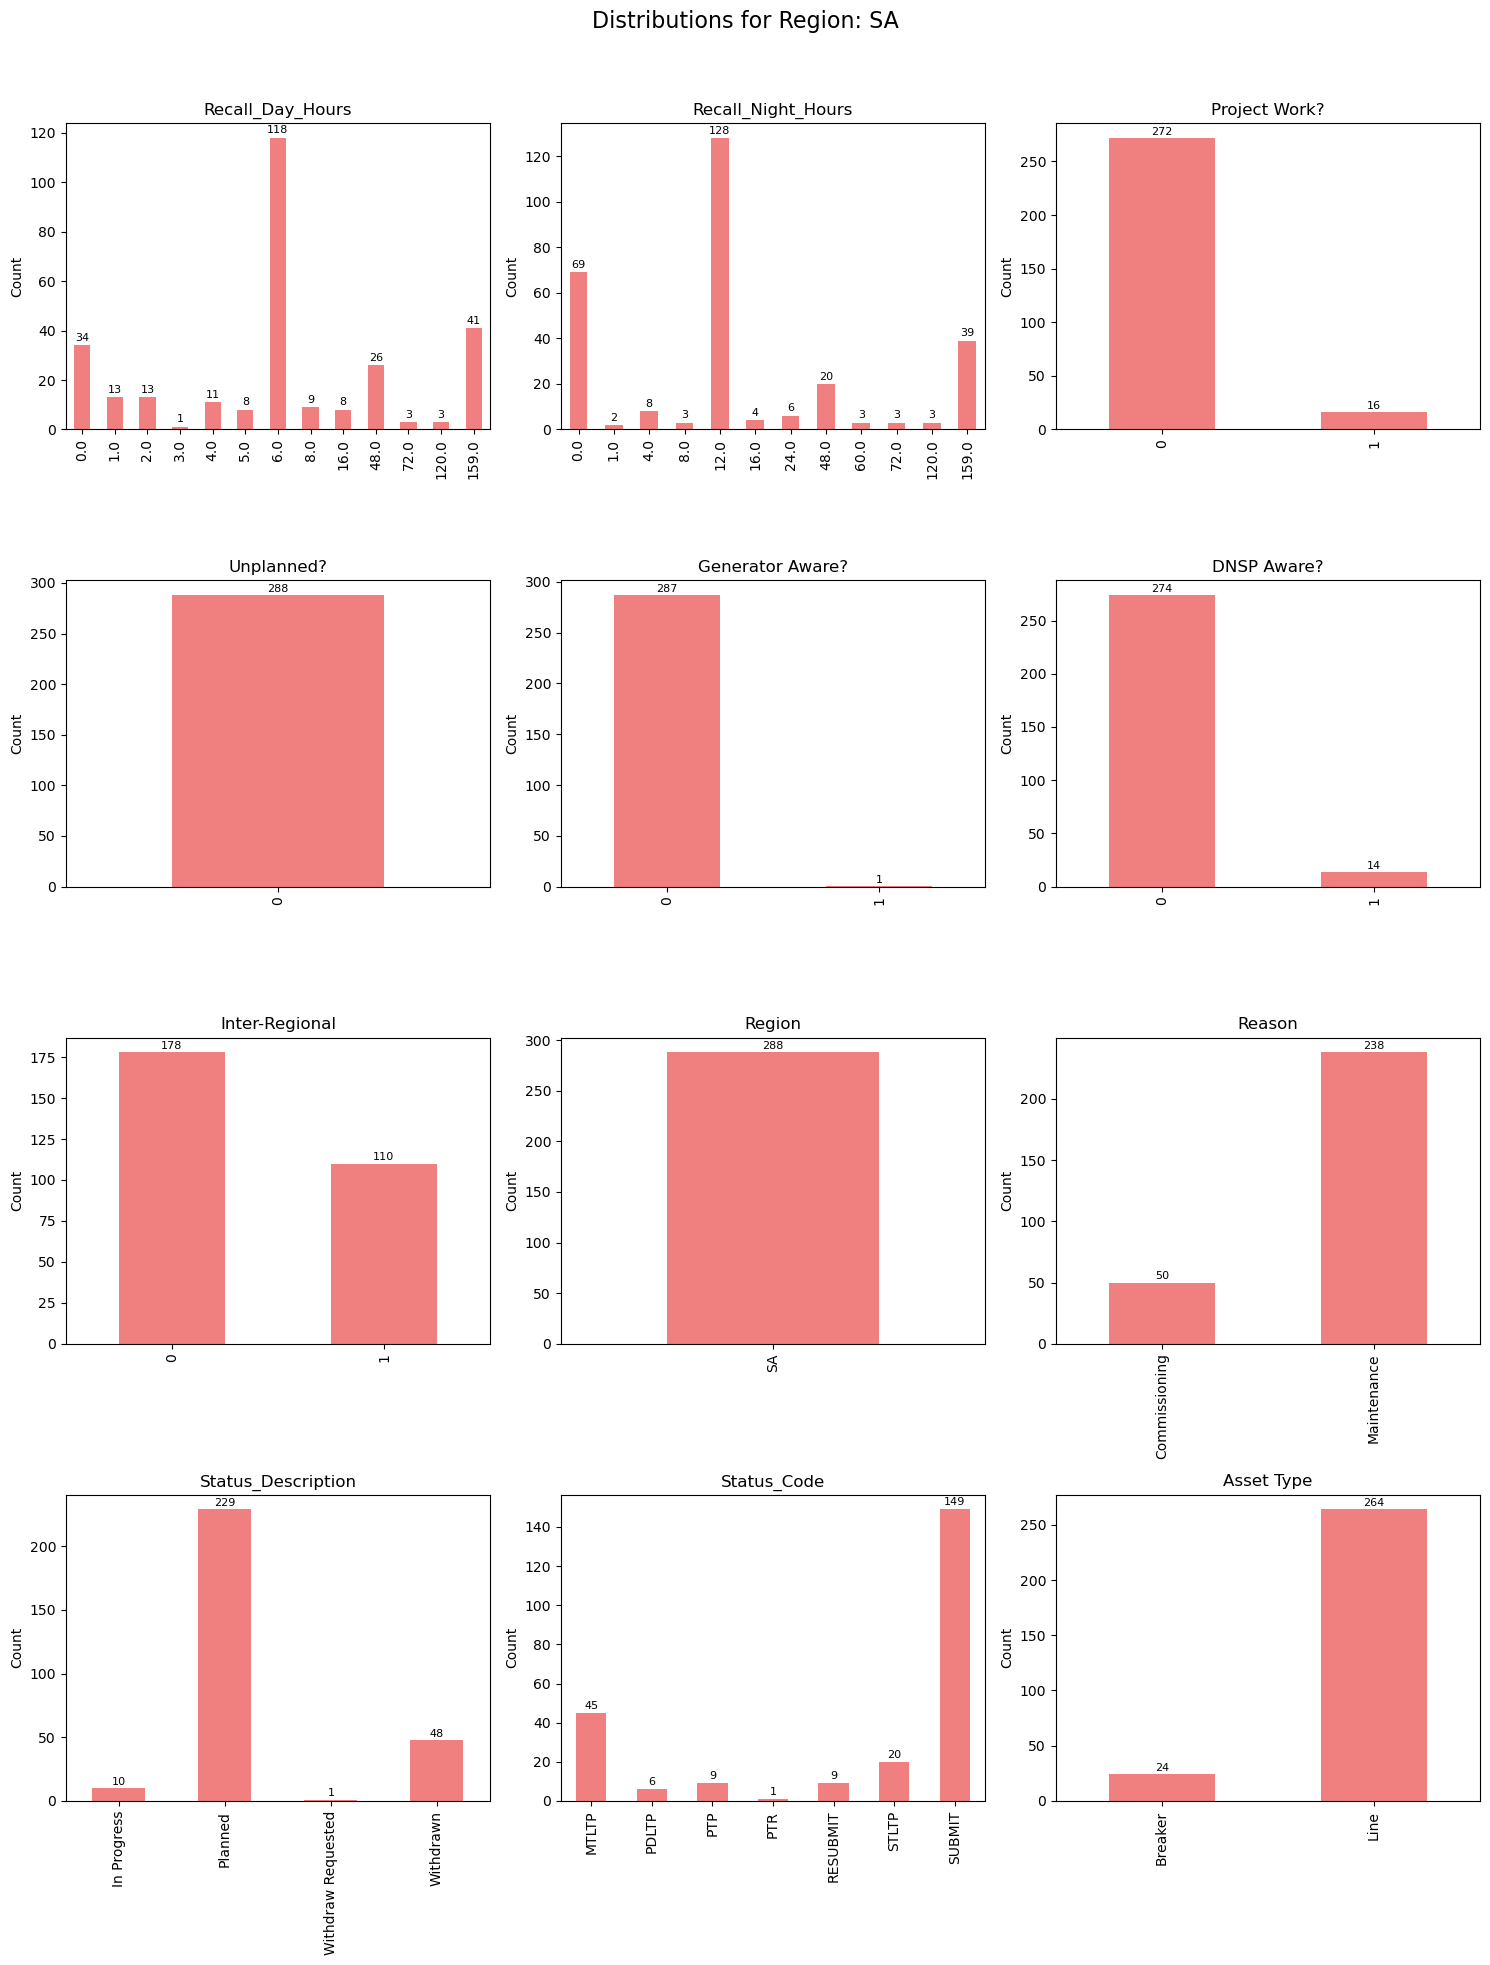

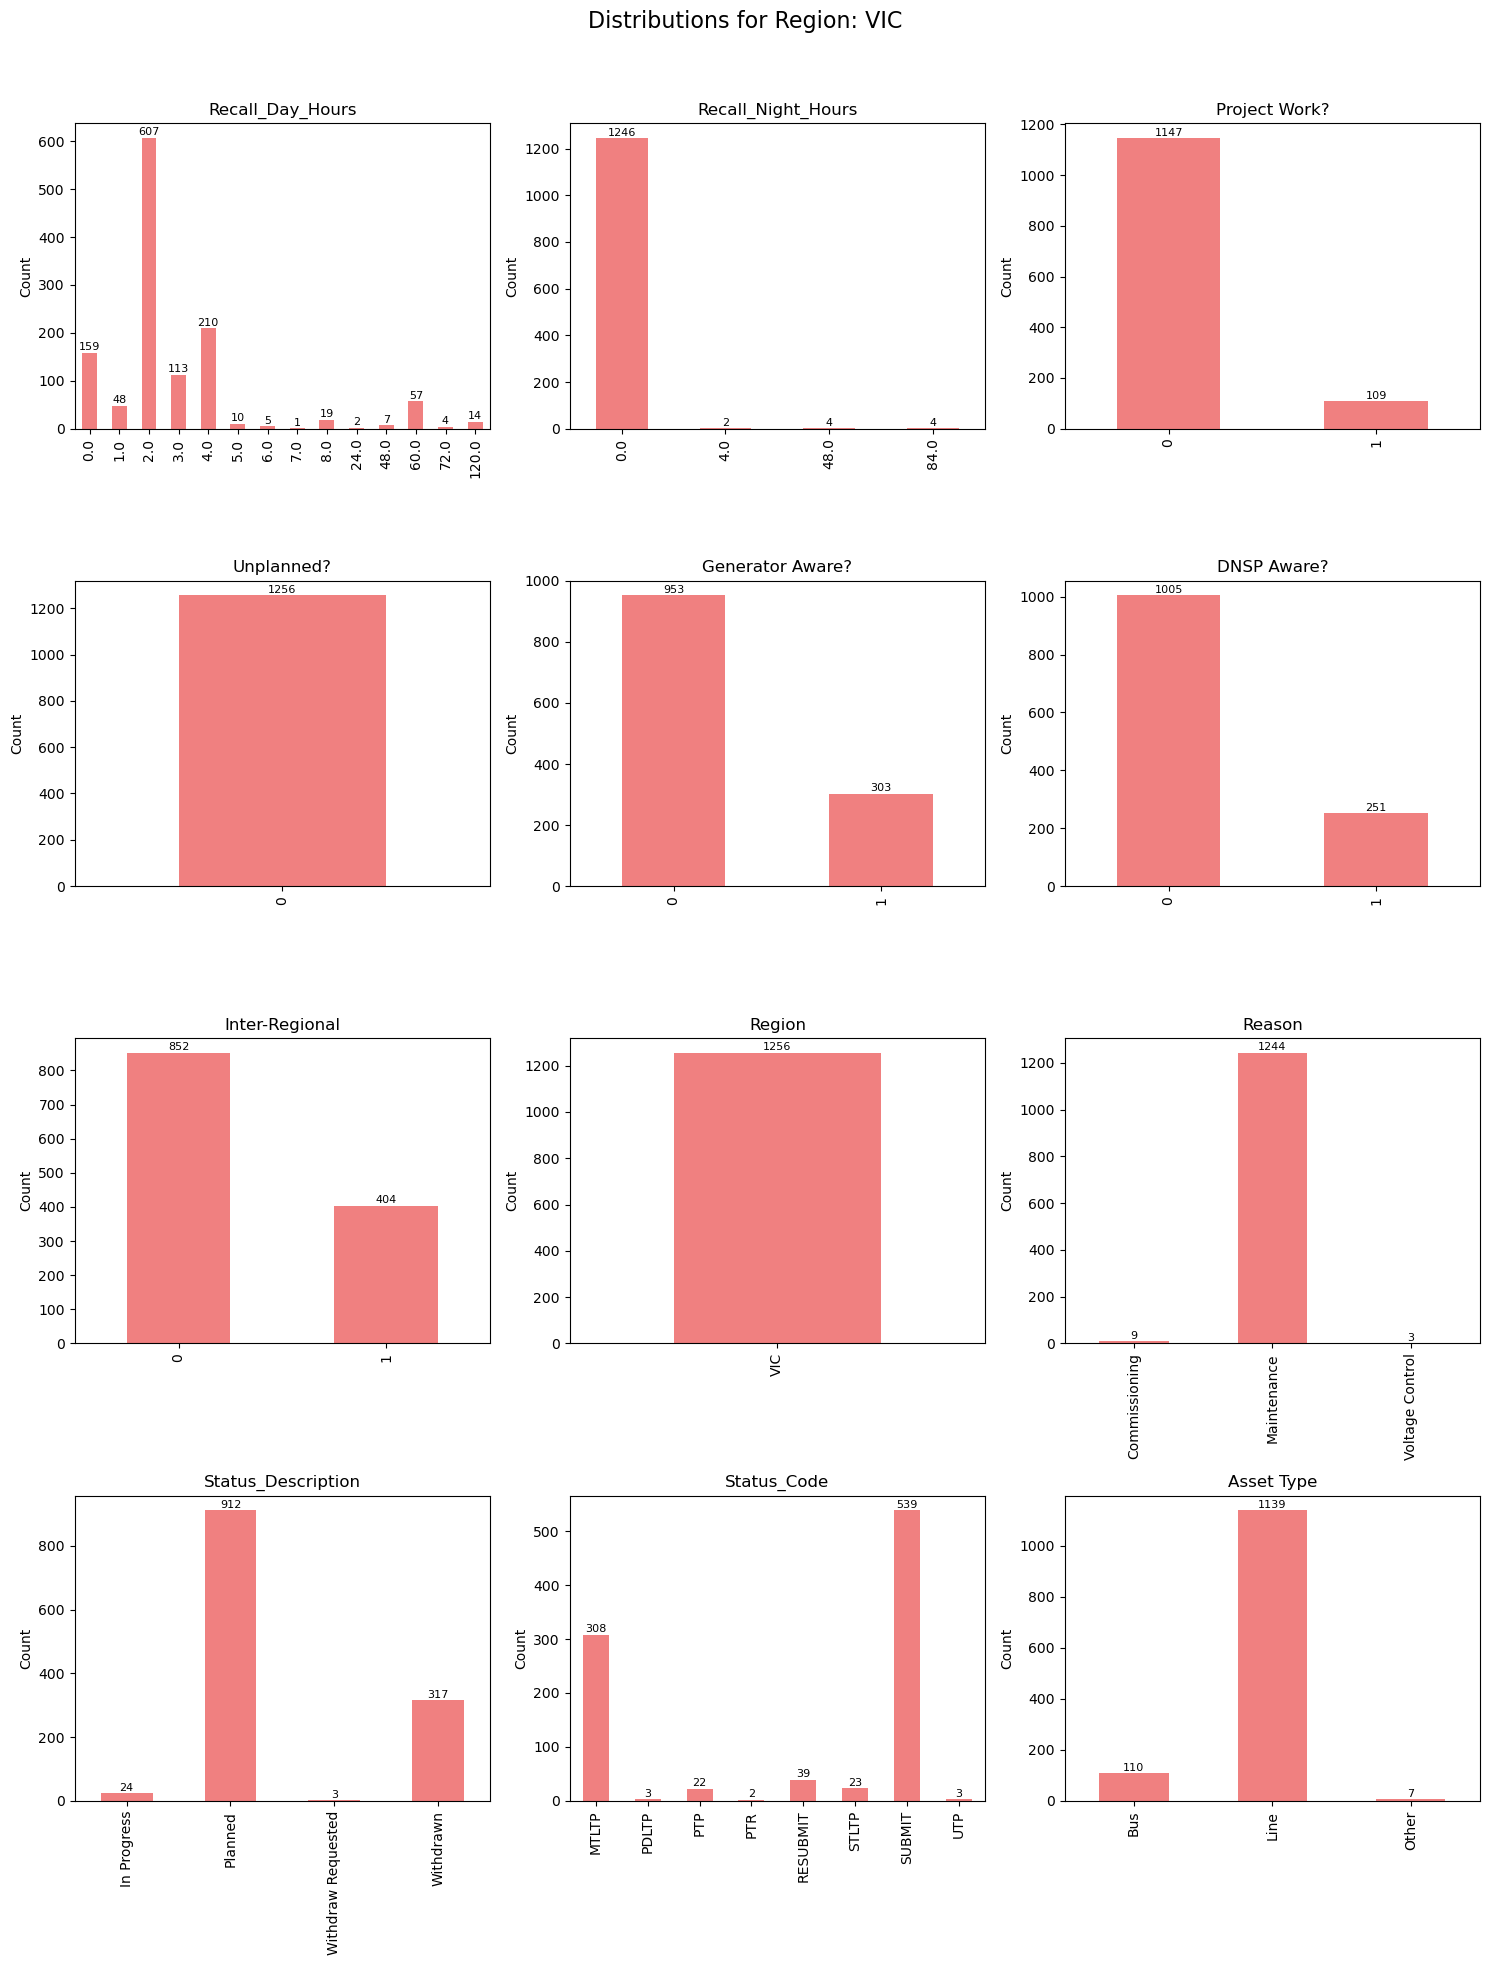

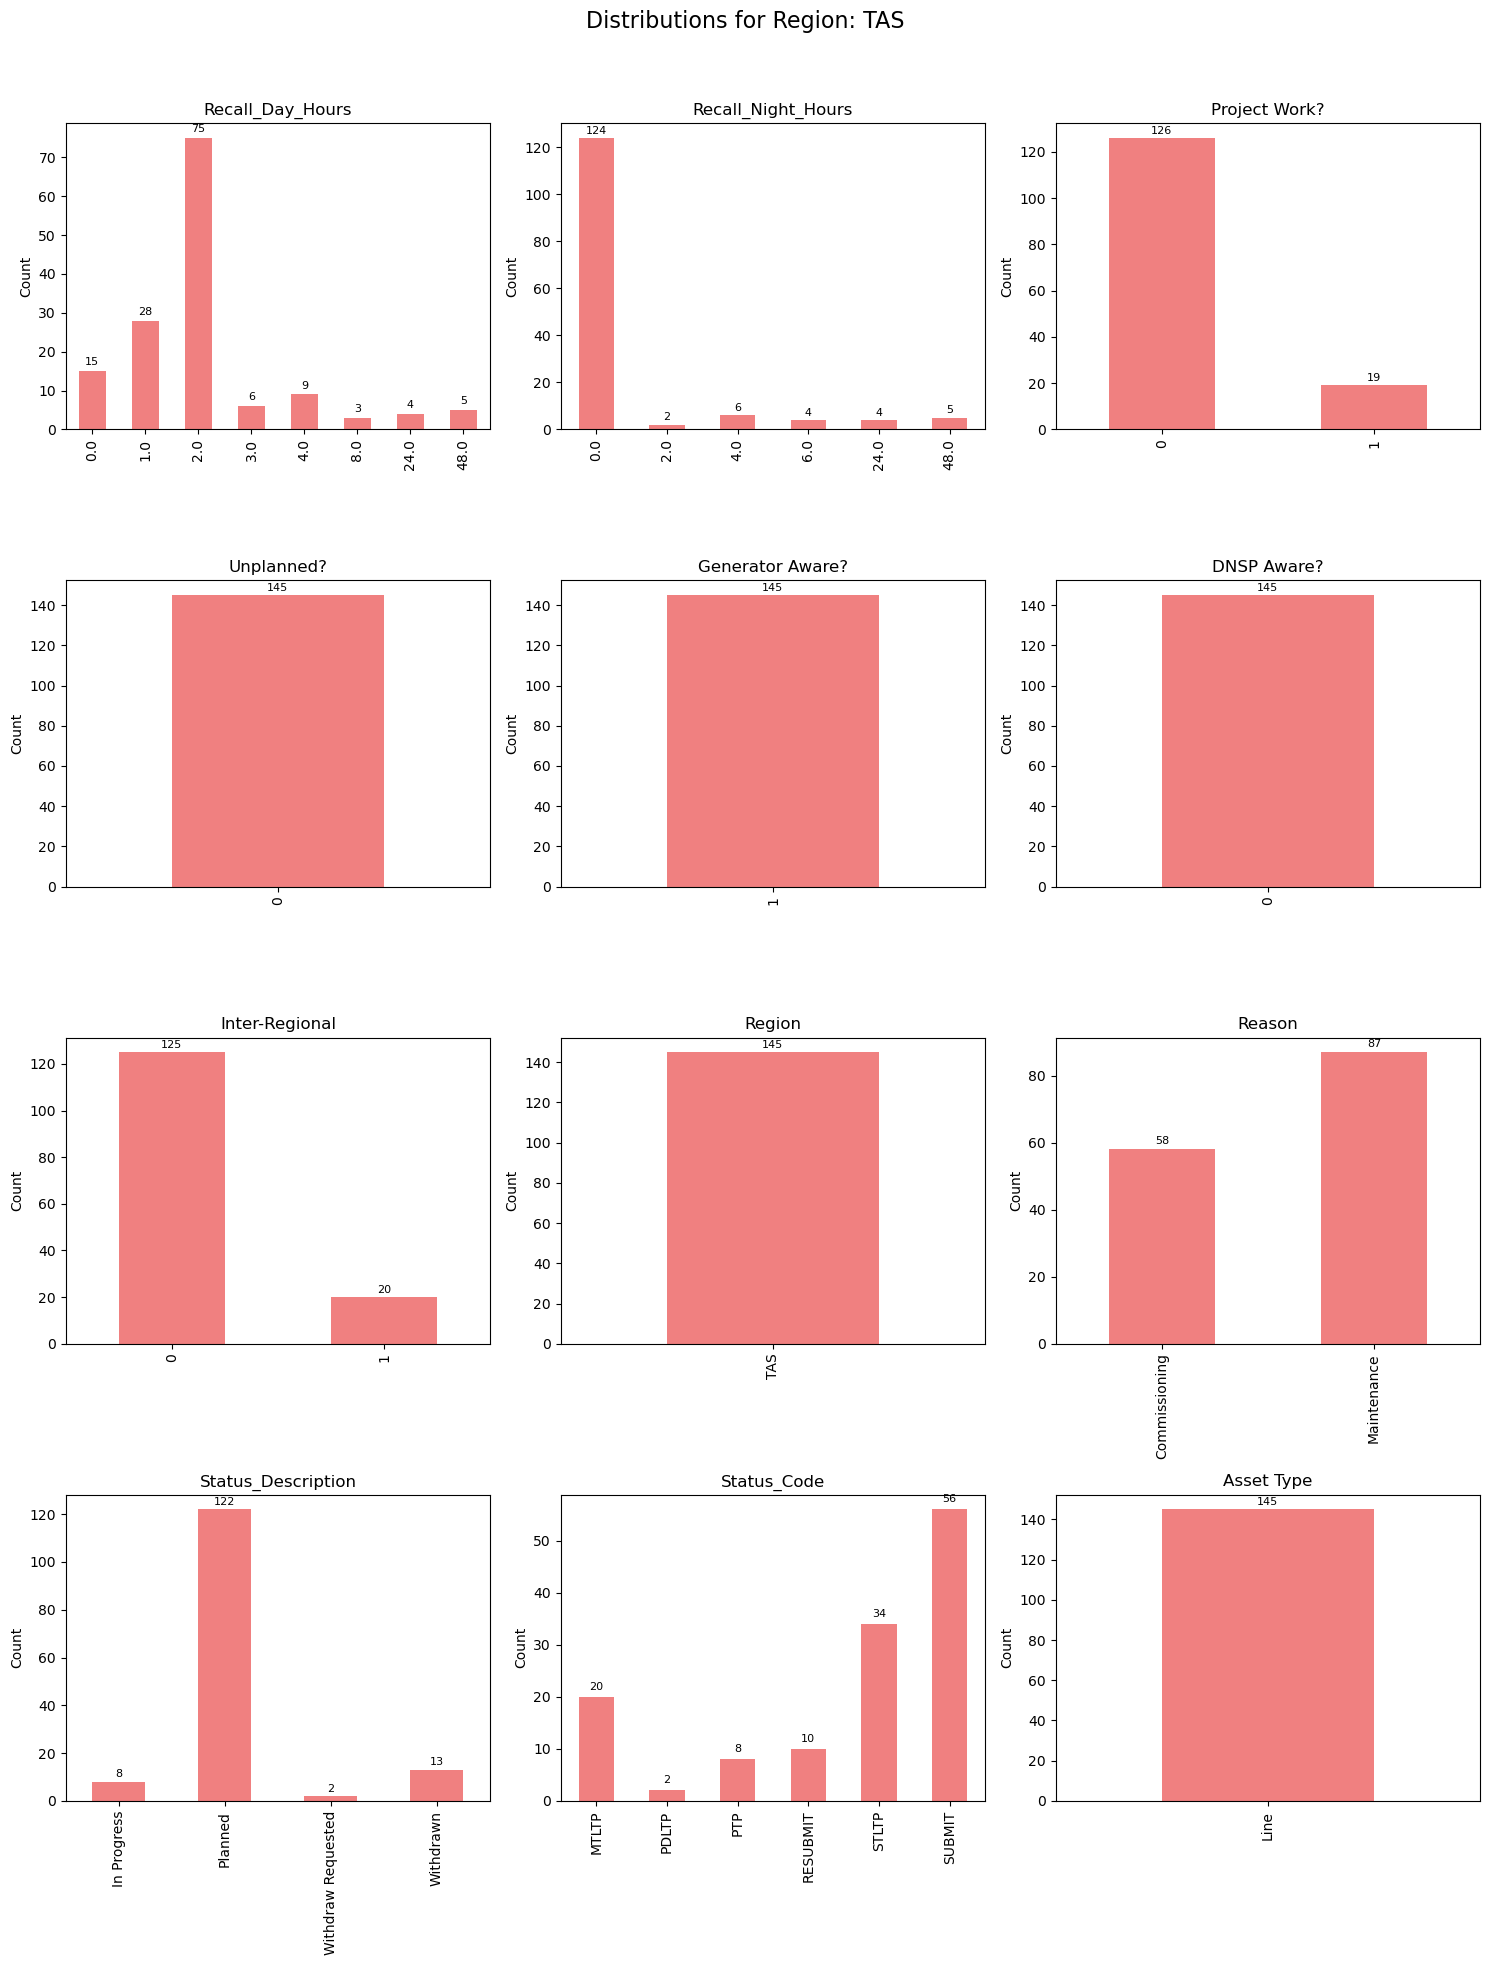

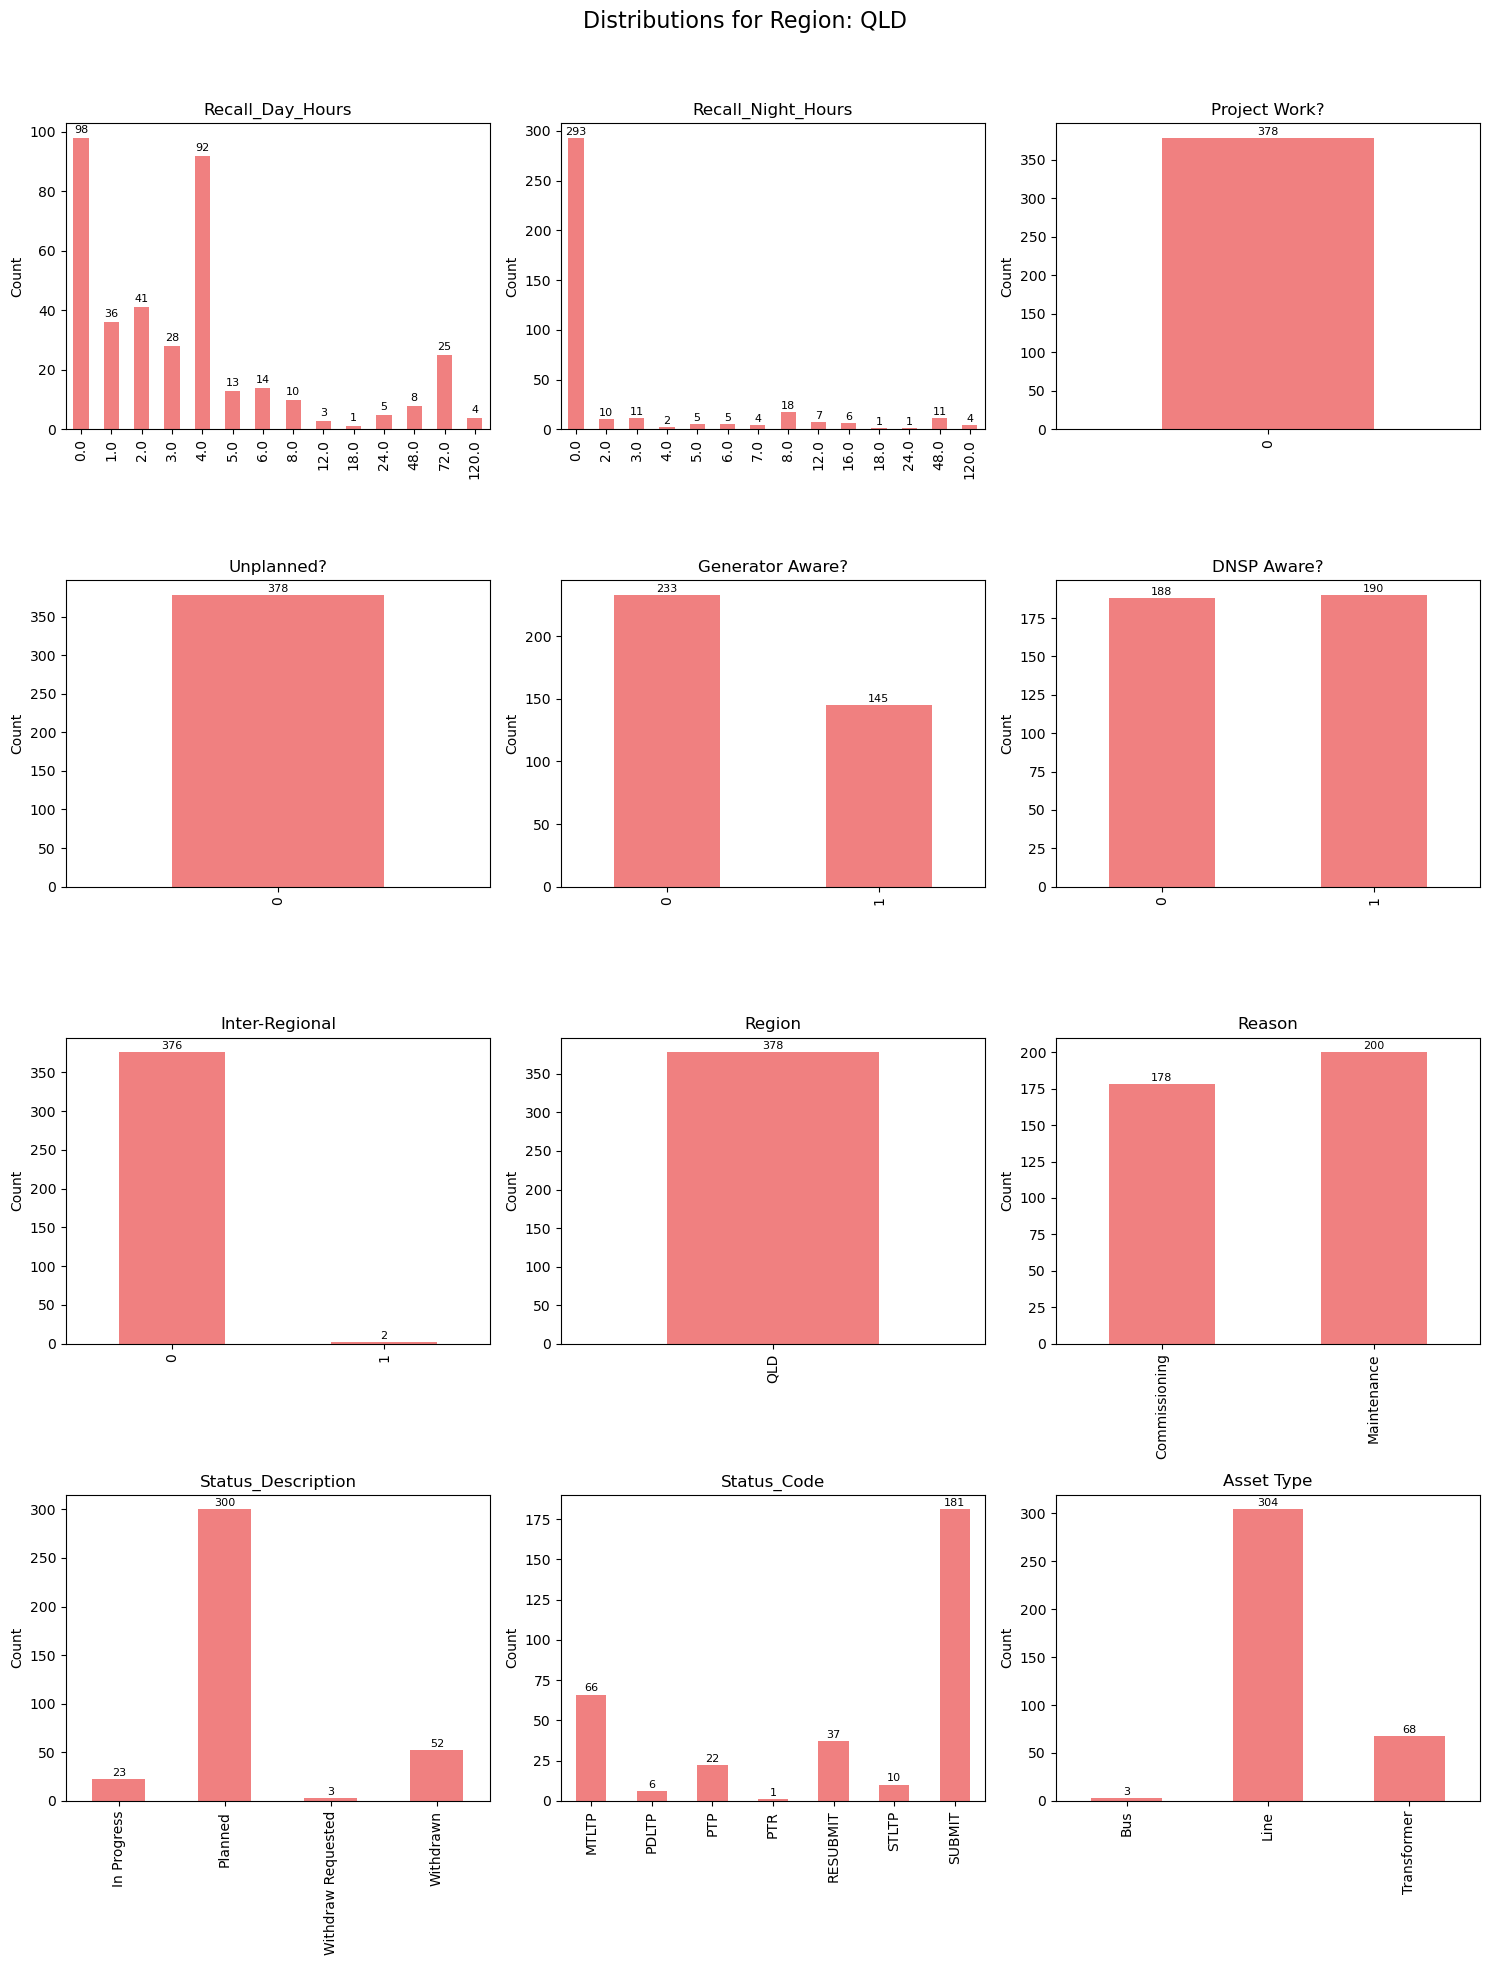

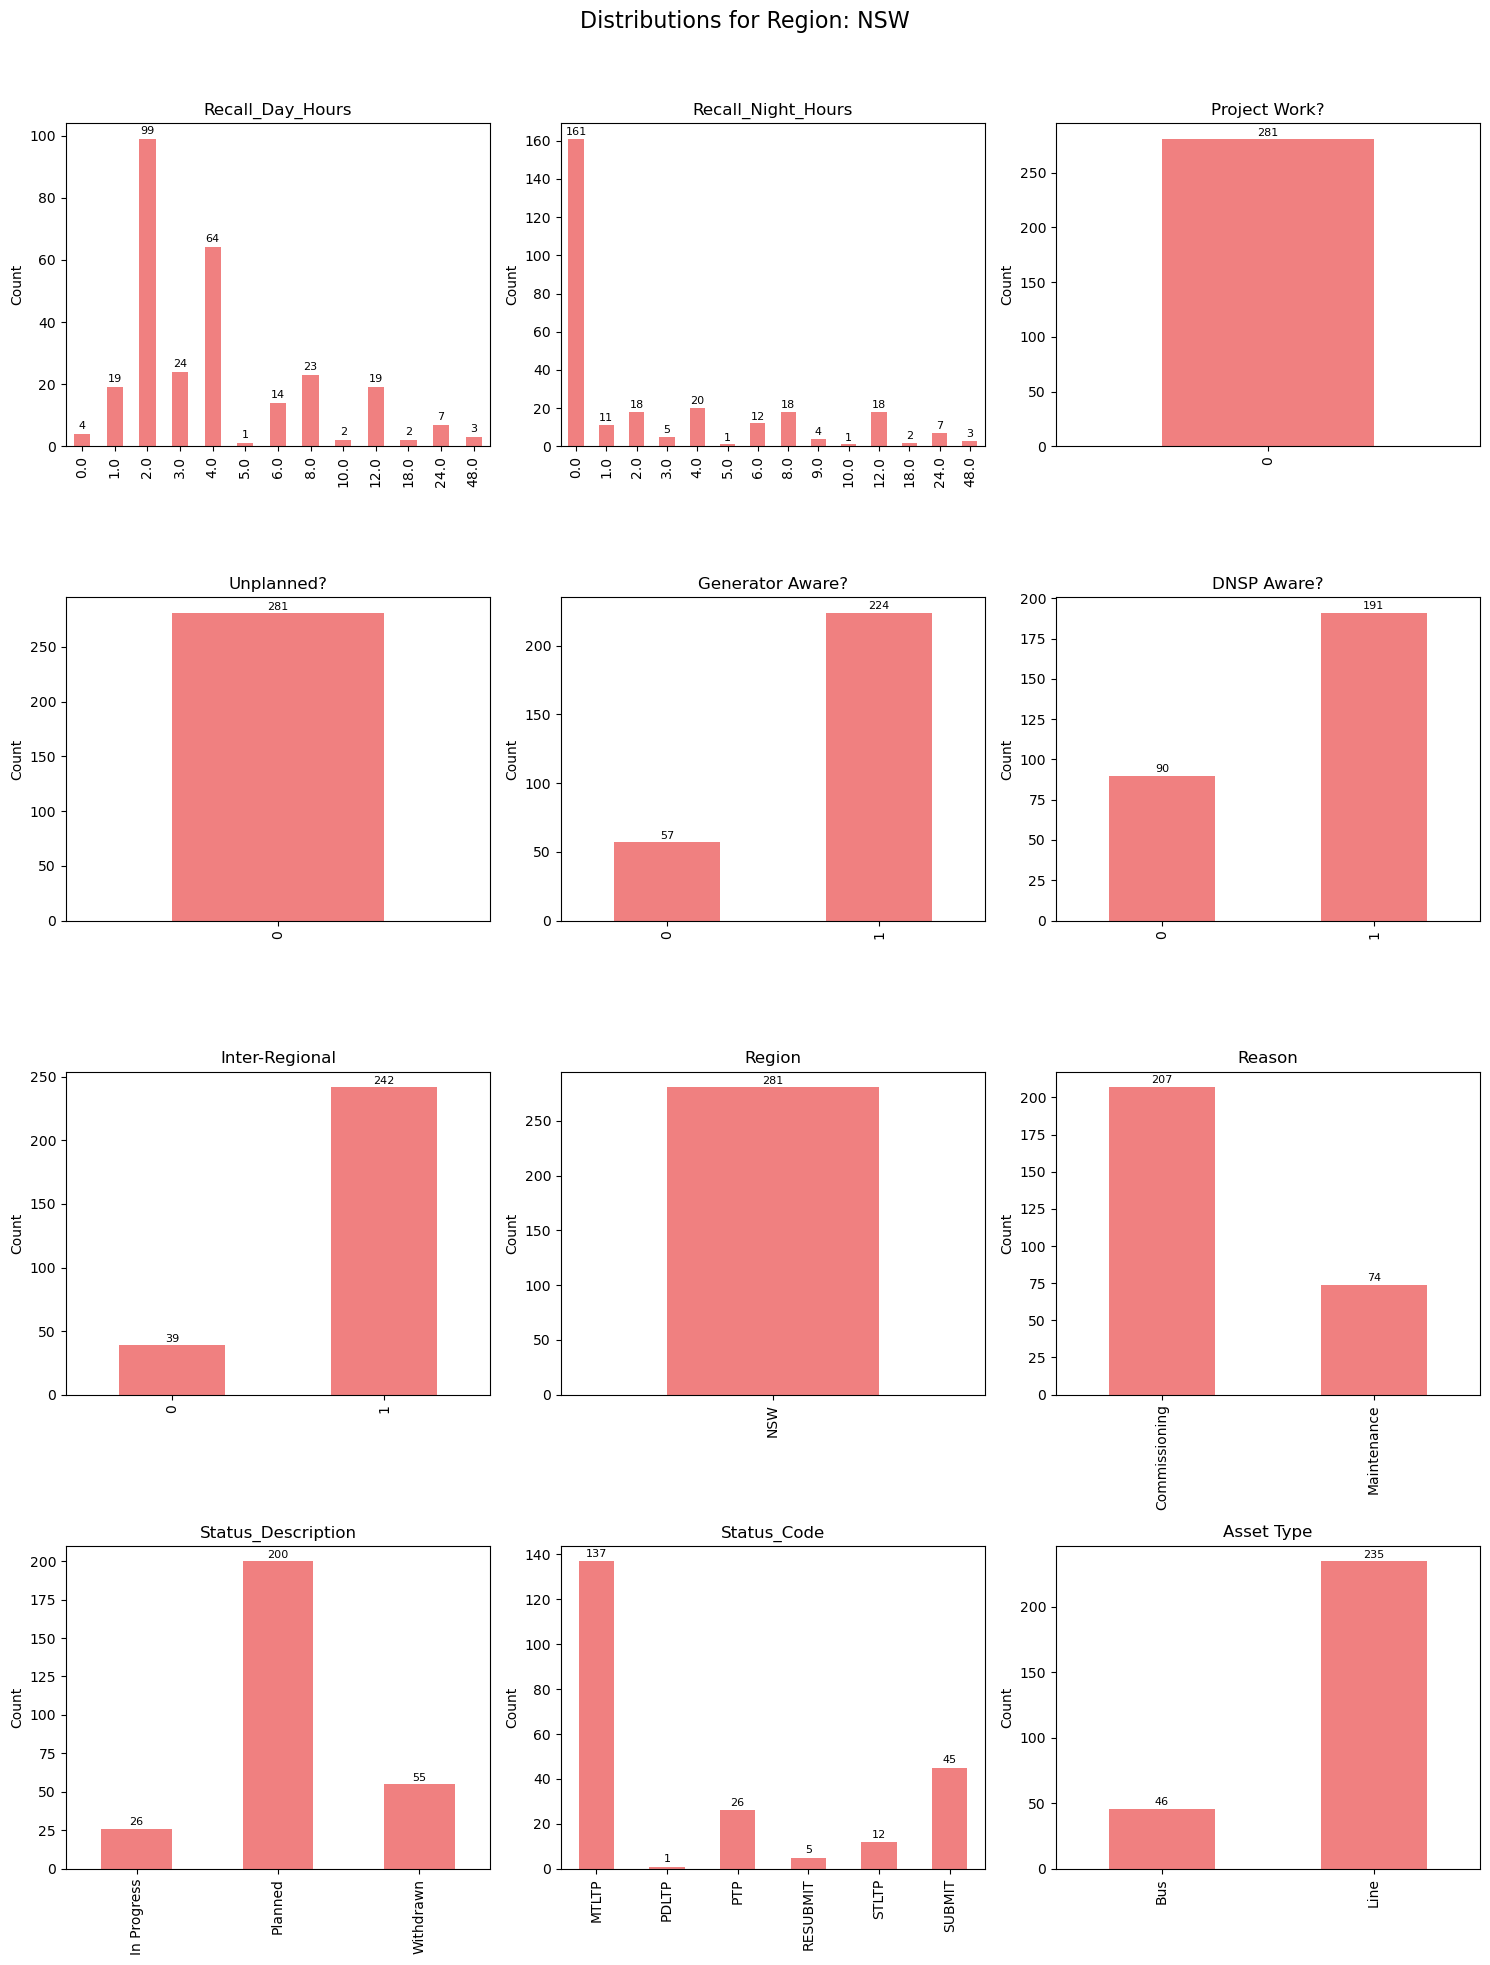

In [4]:
# visualisation for each region

regions = df['Region'].dropna().unique()
n_cols = 3

bool_cols = ['Project Work?', 'Unplanned?', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional']
numeric_cols = ['Recall_Day_Hours', 'Recall_Night_Hours']
categorical_cols = ['Region', 'Reason', 'Status_Description', 'Status_Code', 'Asset Type']

all_cols = numeric_cols + bool_cols + categorical_cols

for region in regions:
    region_df = df[df['Region'] == region]
    n_rows = (len(all_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = axes.flatten()
    fig.suptitle(f'Distributions for Region: {region}', fontsize=16)

    for idx, col in enumerate(all_cols):
        ax = axes[idx]
        counts = region_df[col].value_counts().sort_index()
        counts.plot(kind='bar', ax=ax, color='lightcoral')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        for i, value in enumerate(counts):
            ax.text(i, value + 1, str(int(value)), ha='center', va='bottom', fontsize=8)

    for j in range(len(all_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Perform regression for each state

In [7]:
from data.functions.regression_summary_and_plots import regression_summary_and_plots

In [8]:
# Loop through each unique region and assign a separate DataFrame
for region in df['Region'].unique():
    var_name = region.replace(" ", "_")  
    globals()[var_name] = df[df['Region'] == region].copy()


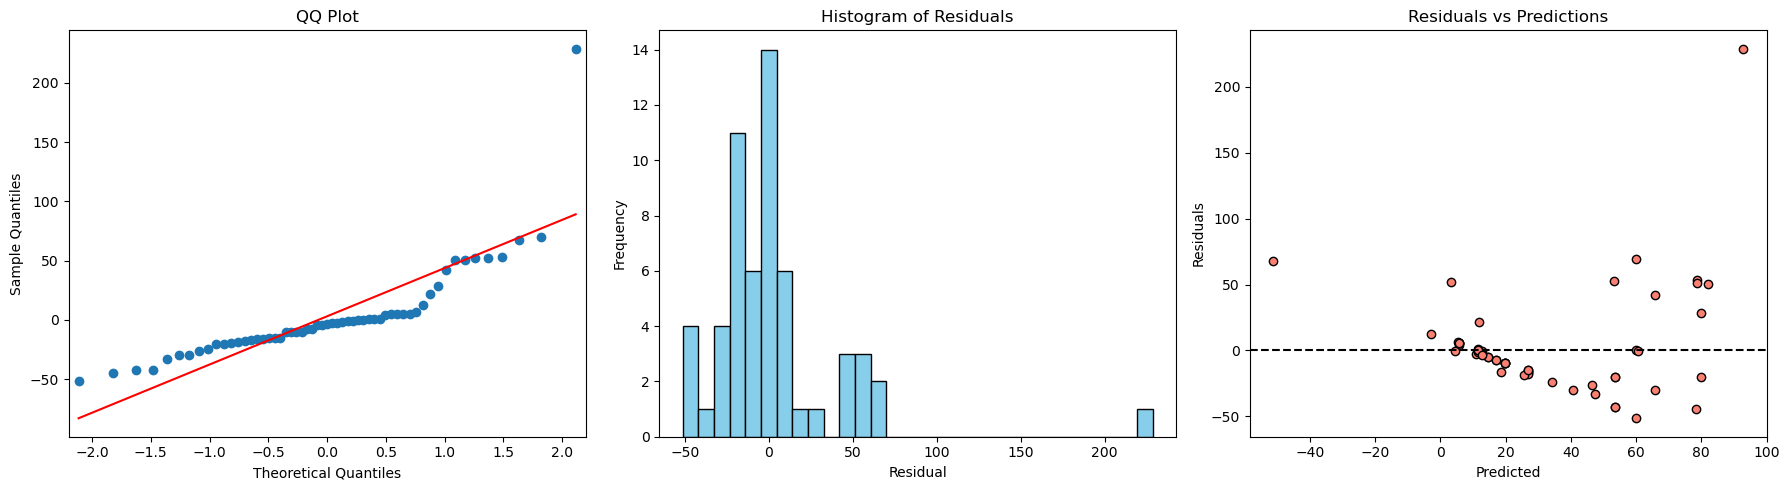

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     27.73
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.78e-24
Time:                        21:11:22   Log-Likelihood:                -1139.1
No. Observations:                 224   AIC:                             2292.
Df Residuals:                     217   BIC:                             2316.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8207      3.152     12.633      0.0

In [9]:
regression_summary_and_plots(NSW, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional', 'Reason'])

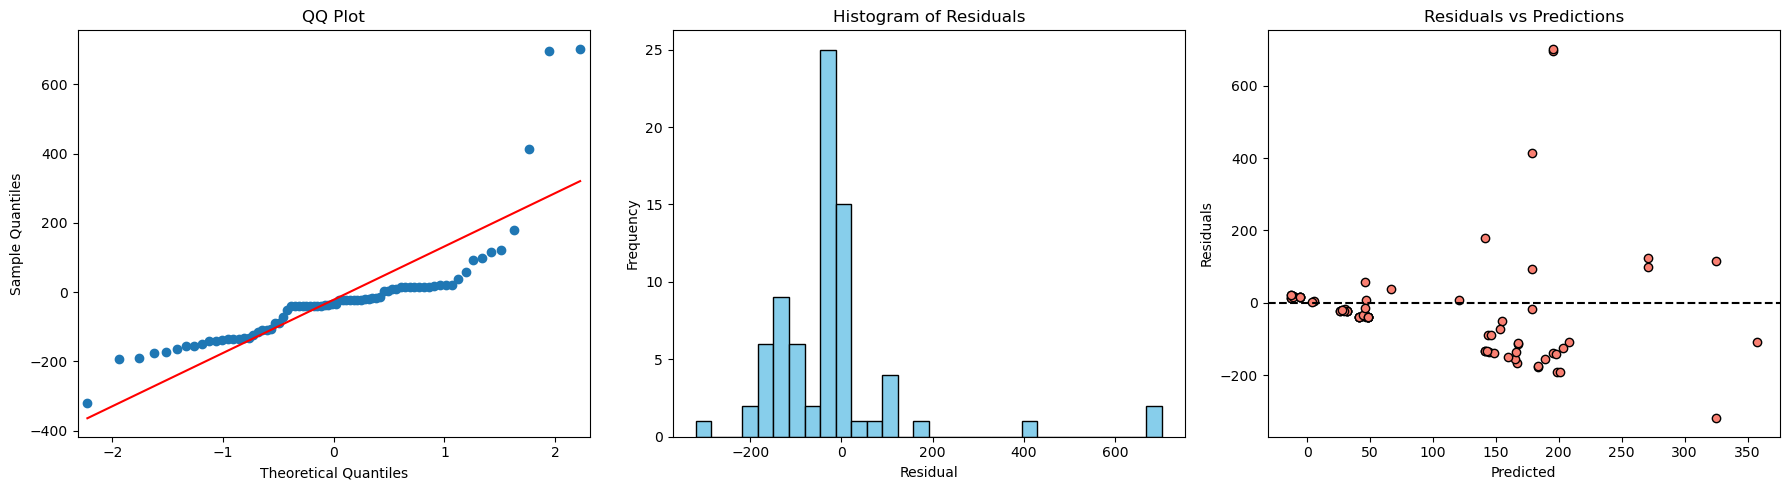

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.93
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           6.61e-18
Time:                        21:11:22   Log-Likelihood:                -1961.5
No. Observations:                 302   AIC:                             3935.
Df Residuals:                     296   BIC:                             3957.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        183.1848     13.867     13.210      0.0

In [10]:
regression_summary_and_plots(QLD, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Reason'])

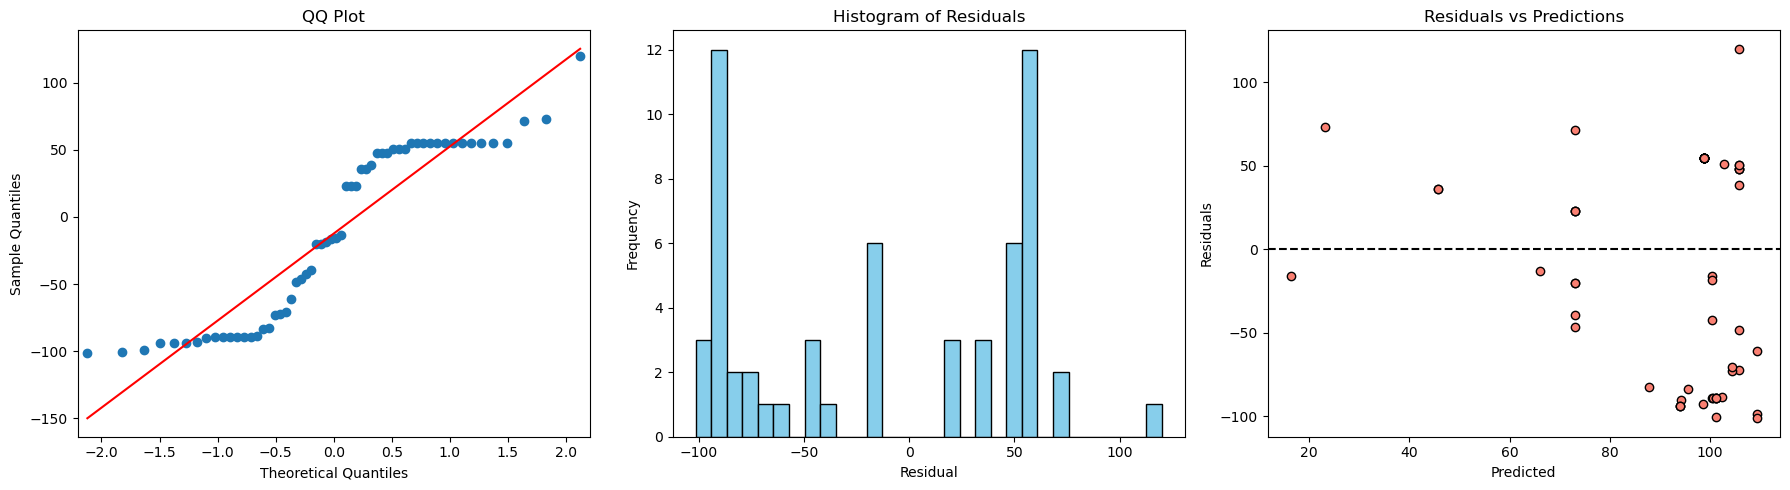

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.494
Date:                Mon, 28 Apr 2025   Prob (F-statistic):             0.0439
Time:                        21:11:23   Log-Likelihood:                -1352.3
No. Observations:                 230   AIC:                             2715.
Df Residuals:                     225   BIC:                             2732.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6607     27.425      1.082      0.2

In [11]:
regression_summary_and_plots(SA, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Inter-Regional', 'Reason'])

In [12]:
regression_summary_and_plots(VIC, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional', 'Reason'])

ValueError: shapes (252,7) and (8,) not aligned: 7 (dim 1) != 8 (dim 0)

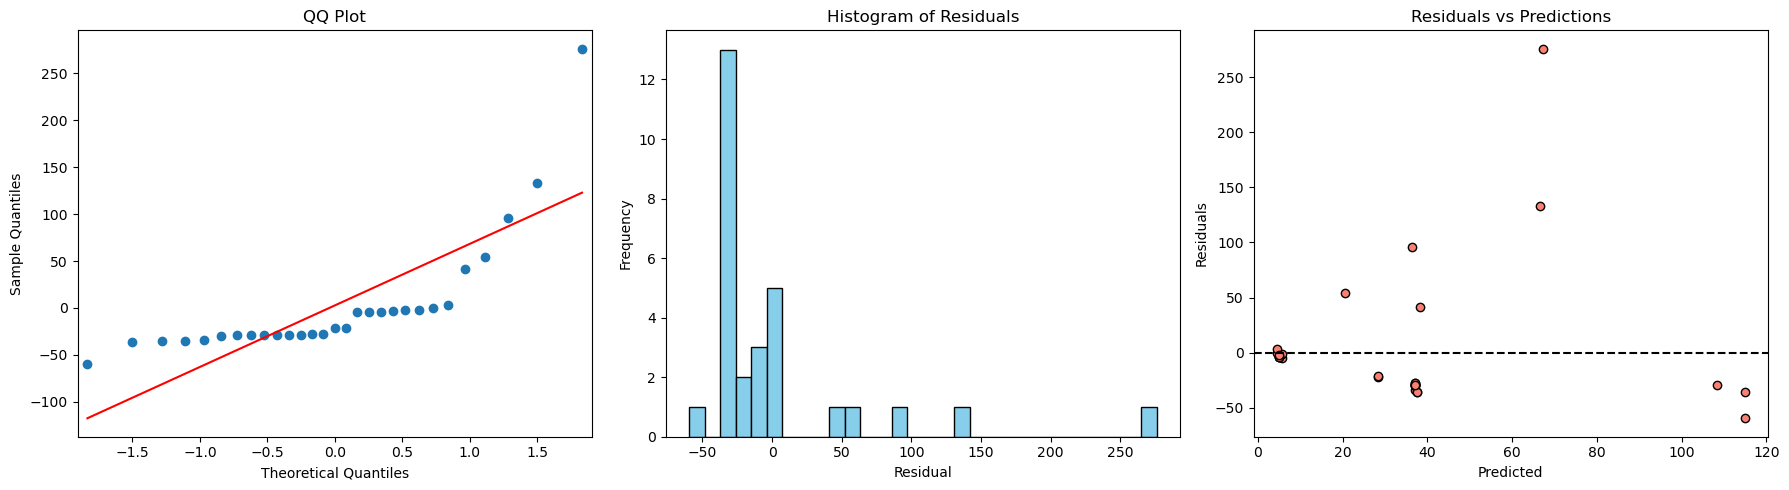

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.156
Date:                Mon, 28 Apr 2025   Prob (F-statistic):             0.0641
Time:                        21:11:43   Log-Likelihood:                -651.05
No. Observations:                 116   AIC:                             1314.
Df Residuals:                     110   BIC:                             1331.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2936     11.255      1.270      0.2

In [13]:
regression_summary_and_plots(TAS, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Project Work?', 'Inter-Regional', 'Reason'])